# Introduction to Pandas

(The materials in this notebook were taken directly from http://www.datacarpentry.org/python-ecology-lesson/01-starting-with-data/. )

Start by importing the Pandas ***library***, which brings in all of the functions and data types that are associated with this package. We use the ***alias*** of "pd" so that we don't have to type "pandas." before every function call.

![Panda slide](https://media.giphy.com/media/TObbUke0z8Mo/giphy.gif)
*(Imagine all of the functions and data types from Pandas sliding into place)*

In [1]:
import pandas as pd

### Reading a CSV into a DataFrame

We read in the csv file directly from the URL using the *read_csv* function. Try typing in "pd.read_" and press the Tab button to see all of the different formats that Pandas supports, other than csv.

In [2]:
surveys_df = pd.read_csv('https://ndownloader.figshare.com/files/2292172')

We can use the *type* function to see what our surveys_df variable is. It is a DataFrame, which is a "2-dimensional data structure that can store data of different types in columns". You can read more about DataFrames here: http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe

In [3]:
print(type(surveys_df))

<class 'pandas.core.frame.DataFrame'>


### Exploring the Survey DataFrame

The info() method shows a lot of useful information (hence the name) about our dataframe: the column names, what types they are, are how many values are not missing.

In [4]:
print(surveys_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35549 entries, 0 to 35548
Data columns (total 9 columns):
record_id          35549 non-null int64
month              35549 non-null int64
day                35549 non-null int64
year               35549 non-null int64
plot_id            35549 non-null int64
species_id         34786 non-null object
sex                33038 non-null object
hindfoot_length    31438 non-null float64
weight             32283 non-null float64
dtypes: float64(2), int64(5), object(2)
memory usage: 2.4+ MB
None


We can also use the *head* method to show just the first few rows of the dataframe. Here we tell it to show the first 5 rows (which is also the default).

In [5]:
print(surveys_df.head(5))

   record_id  month  day  year  plot_id species_id sex  hindfoot_length  \
0          1      7   16  1977        2         NL   M             32.0   
1          2      7   16  1977        3         NL   M             33.0   
2          3      7   16  1977        2         DM   F             37.0   
3          4      7   16  1977        7         DM   M             36.0   
4          5      7   16  1977        3         DM   M             35.0   

   weight  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN  


We can also access specific columns of the dataframe using a similar technique to how we access individual items in a list or dictions (using the name inside square-brackets). We'll spend more time on how to access specific portions of the dataframe in the next lesson...

In [6]:
print(surveys_df['species_id'].head(5))

0    NL
1    NL
2    DM
3    DM
4    DM
Name: species_id, dtype: object


There are a lot of helpful methods built into Pandas that can tell us useful information about the surveys file. Here we run the *unique* method on the *species_id* column.

In [7]:
print(surveys_df['species_id'].unique())

['NL' 'DM' 'PF' 'PE' 'DS' 'PP' 'SH' 'OT' 'DO' 'OX' 'SS' 'OL' 'RM' nan 'SA'
 'PM' 'AH' 'DX' 'AB' 'CB' 'CM' 'CQ' 'RF' 'PC' 'PG' 'PH' 'PU' 'CV' 'UR'
 'UP' 'ZL' 'UL' 'CS' 'SC' 'BA' 'SF' 'RO' 'AS' 'SO' 'PI' 'ST' 'CU' 'SU'
 'RX' 'PB' 'PL' 'PX' 'CT' 'US']


Now that we know the unique values in this columns, let's use the *value_counts* method to see how many of each are in the file. We also pass this method the dropna=False option so we can see how many "NA" (or empty) values are in this column.

In [8]:
print(surveys_df['species_id'].value_counts(dropna=False))

DM     10596
PP      3123
DO      3027
PB      2891
RM      2609
DS      2504
OT      2249
PF      1597
PE      1299
NL      1252
OL      1006
PM       899
NaN      763
AH       437
AB       303
SS       248
SH       147
SA        75
RF        75
CB        50
BA        46
SO        43
SF        43
DX        40
PC        39
PL        36
PH        32
CQ        16
CM        13
OX        12
UR        10
PI         9
RO         8
UP         8
PG         8
PX         6
PU         5
SU         5
US         4
UL         4
AS         2
ZL         2
RX         2
CV         1
ST         1
CS         1
CU         1
SC         1
CT         1
Name: species_id, dtype: int64


### Calculating statistics from data in a Pandas DataFrame

We can use the *describe* method to quickly access several summary statistics on the weight column from the dataframe.

In [9]:
print(surveys_df['weight'].describe())

count    32283.000000
mean        42.672428
std         36.631259
min          4.000000
25%         20.000000
50%         37.000000
75%         48.000000
max        280.000000
Name: weight, dtype: float64


Even though the *describe* method gave us a few pieces of data, we can individually access each of them with their own dedicated methods.

In [10]:
print(surveys_df['weight'].min())

4.0


In [11]:
print(surveys_df['weight'].median())

37.0


### Groups in Pandas

if we want to summarize by one or more variables, for example sex, we can use Pandas’ *groupby* method. Once we’ve created a groupby DataFrame, we can quickly calculate summary statistics by a group of our choice.

In [12]:
grouped_data = surveys_df.groupby('sex')

grouped_data.describe()

day                                                  hindfoot_length  \
       count       mean       std  min  25%   50%   75%   max           count   
sex                                                                             
F    15690.0  16.007138  8.271144  1.0  9.0  16.0  23.0  31.0         14894.0   
M    17348.0  16.184286  8.199274  1.0  9.0  16.0  23.0  31.0         16476.0   

                 ...   weight            year                                 \
          mean   ...      75%    max    count         mean       std     min   
sex              ...                                                           
F    28.836780   ...     46.0  274.0  15690.0  1990.644997  7.598725  1977.0   
M    29.709578   ...     49.0  280.0  17348.0  1990.480401  7.403655  1977.0   

                                     
        25%     50%     75%     max  
sex                                  
F    1984.0  1990.0  1997.0  2002.0  
M    1984.0  1990.0  1997.0  2002.0  

[2 rows x 56 columns]

This output is a little overwhelming, but let's look at just 1 specific statistical measure (*mean*).

You'll see that all numerical columns have their mean calculcated for the 2 sex values. The first few columns don't tell us much usefull, but the "hindfoot_length" and "weight" columns are interesting. They tell us that -- on average -- males animals are larger than females.

In [13]:
grouped_data.mean()

,record_id,month,day,year,plot_id,hindfoot_length,weight
sex,,,,,,,
F,18036.412046,6.583047,16.007138,1990.644997,11.440854,28.836780,42.170555
M,17754.835601,6.392668,16.184286,1990.480401,11.098282,29.709578,42.995379


**Challenge Question 1**: How many recorded individuals are female F and how many male M?

In [14]:
print(surveys_df['sex'].value_counts())

M    17348
F    15690
Name: sex, dtype: int64


**Challenge Question 2**: What happens when you group by two columns using the following syntax and then grab mean values?:

* `grouped_data2 = surveys_df.groupby(['plot_id','sex'])`
* `grouped_data2.mean()`

In [15]:
grouped_data2 = surveys_df.groupby(['plot_id','sex'])

In [16]:
grouped_data2.mean()

record_id     month        day         year  hindfoot_length  \
plot_id sex                                                                    
1       F    18390.384434  6.597877  15.338443  1990.933962        31.733911   
        M    17197.740639  6.121461  15.905936  1990.091324        34.302770   
2       F    17714.753608  6.426804  16.288660  1990.449485        30.161220   
        M    18085.458042  6.340035  15.440559  1990.756119        30.353760   
3       F    19888.783875  6.604703  16.161254  1992.013438        23.774044   
        M    20226.767857  6.271429  16.450000  1992.275000        23.833744   
4       F    17489.205275  6.442661  15.746560  1990.235092        33.249102   
        M    18493.841748  6.430097  16.507767  1991.000971        34.097959   
5       F    12280.793169  6.142315  15.722960  1986.485769        28.921844   
        M    12798.426621  6.194539  15.703072  1986.817406        29.694794   
6       F    19406.503392  6.628223  16.313433  1991.579376        26.981322   
        M    17849.574607  6.035340  16.091623  1990.556283        27.425591   
7       F    19069.668657  6.385075  15.313433  1991.441791        19.779553   
        M    19188.729642  6.719870  15.778502  1991.462541        20.536667   
8       F    18920.276190  6.632143  15.836905  1991.267857        32.187578   
        M    19452.109868  6.571719  15.854527  1991.686673        33.751059   
9       F    16217.497069  6.499414  15.555686  1989.303634        35.126092   
        M    18000.710159  6.361554  15.209163  1990.632470        34.175732   
10      F    16001.496454  5.588652  16.964539  1989.248227        18.641791   
        M    15708.704225  5.718310  16.739437  1989.007042        19.567164   
11      F    16994.962287  6.759124  16.283455  1989.836983        32.029299   
        M    16933.909621  6.374150  15.974733  1989.856171        32.078014   
12      F    17457.966981  6.509434  16.305660  1990.266981        30.975124   
        M    17592.327500  6.304167  16.367500  1990.400833        31.762489   
13      F    18033.100318  6.802548  16.229299  1990.619427        27.201014   
        M    16969.044700  6.480204  16.005109  1989.911877        27.893793   
14      F    17097.145275  6.510578  16.681241  1989.974612        32.973373   
        M    17891.948598  6.660748  16.504673  1990.587850        32.961802   
15      F    20602.449064  6.569647  16.162162  1992.523909        21.949891   
        M    18104.019560  6.185819  17.413203  1990.770171        21.803109   
16      F    19002.445946  6.360360  16.819820  1991.351351        23.144928   
        M    18434.714286  6.201465  16.622711  1990.926740        23.480916   
17      F    18234.322870  6.650224  15.892377  1990.785874        30.918536   
        M    18857.651472  6.569801  16.183286  1991.331434        32.227634   
18      F    17940.875497  6.698013  15.960265  1990.536424        26.690341   
        M    15106.718850  6.610224  16.797125  1988.551118        27.703072   
19      F    21848.216475  6.701149  15.226054  1993.417625        21.257937   
        M    19470.779690  6.533563  16.647160  1991.740103        21.071685   
20      F    17510.769231  6.743077  16.026154  1990.253846        27.069193   
        M    16076.192496  6.489396  16.375204  1989.243067        27.908451   
21      F    22452.636661  6.860884  16.307692  1993.878887        22.366554   
        M    20120.399113  6.671840  16.203991  1992.199557        21.736721   
22      F    18499.695976  6.651267  15.521610  1990.973174        34.108320   
        M    18015.365527  6.381872  16.682021  1990.650817        33.359746   
23      F    15863.193939  6.860606  16.036364  1989.024242        20.051948   
        M    17091.338164  6.391304  16.077295  1989.961353        19.850000   
24      F    13702.224280  6.596708  16.393004  1987.485597        26.993377   
        M    15208.136082  6.360825  16.971134  1988.641237        25.786996   

               

That last *mean* output again showed us a lot of summary "data" on record ids and dates, so let's just look at the "hindfoot_length" and "weight" columns.

In [17]:
grouped_data2[['hindfoot_length','weight']].mean()

hindfoot_length     weight
plot_id sex                            
1       F          31.733911  46.311138
        M          34.302770  55.950560
2       F          30.161220  52.561845
        M          30.353760  51.391382
3       F          23.774044  31.215349
        M          23.833744  34.163241
4       F          33.249102  46.818824
        M          34.097959  48.888119
5       F          28.921844  40.974806
        M          29.694794  40.708551
6       F          26.981322  36.352288
        M          27.425591  36.867388
7       F          19.779553  20.006135
        M          20.536667  21.194719
8       F          32.187578  45.623011
        M          33.751059  49.641372
9       F          35.126092  53.618469
        M          34.175732  49.519309
10      F          18.641791  17.094203
        M          19.567164  19.971223
11      F          32.029299  43.515075
        M          32.078014  43.366197
12      F          30.975124  49.831731
        M          31.762489  48.909710
13      F          27.201014  40.524590
        M          27.893793  40.097754
14      F          32.973373  47.355491
        M          32.961802  45.159378
15      F          21.949891  26.670236
        M          21.803109  27.523691
16      F          23.144928  25.810427
        M          23.480916  23.811321
17      F          30.918536  48.176201
        M          32.227634  47.558853
18      F          26.690341  36.963514
        M          27.703072  43.546952
19      F          21.257937  21.978599
        M          21.071685  20.306878
20      F          27.069193  52.624406
        M          27.908451  44.197279
21      F          22.366554  25.974832
        M          21.736721  22.772622
22      F          34.108320  53.647059
        M          33.359746  54.572531
23      F          20.051948  20.564417
        M          19.850000  18.941463
24      F          26.993377  47.914405
        M          25.786996  39.321503

**Challenge Question 3**: Summarize weight values for each plot in your data. 

HINT: you can use the following syntax to only create summary statistics for one column in your data:
`by_plot['weight'].describe()`

In [18]:
another_group = surveys_df.groupby('plot_id')
another_group['weight'].describe()

,count,mean,std,min,25%,50%,75%,max
plot_id,,,,,,,,
1,1903.0,51.822911,38.176670,4.0,30.0,44.0,53.0,231.0
2,2074.0,52.251688,46.503602,5.0,24.0,41.0,50.0,278.0
3,1710.0,32.654386,35.641630,4.0,14.0,23.0,36.0,250.0
4,1866.0,47.928189,32.886598,4.0,30.0,43.0,50.0,200.0
5,1092.0,40.947802,34.086616,5.0,21.0,37.0,48.0,248.0
6,1463.0,36.738893,30.648310,5.0,18.0,30.0,45.0,243.0
7,638.0,20.663009,21.315325,4.0,11.0,17.0,23.0,235.0
8,1781.0,47.758001,33.192194,5.0,26.0,44.0,51.0,178.0
9,1811.0,51.432358,33.724726,6.0,36.0,45.0,50.0,275.0


### Creating summary counts in Pandas

You can also use the *groupby* functionality to count the number of records per species. Here we pass it the "record_id" column to count, since we know that all records have a value in this column.

In [19]:
species_counts = surveys_df.groupby('species_id')['record_id'].count()
print(species_counts)

species_id
AB      303
AH      437
AS        2
BA       46
CB       50
CM       13
CQ       16
CS        1
CT        1
CU        1
CV        1
DM    10596
DO     3027
DS     2504
DX       40
NL     1252
OL     1006
OT     2249
OX       12
PB     2891
PC       39
PE     1299
PF     1597
PG        8
PH       32
PI        9
PL       36
PM      899
PP     3123
PU        5
PX        6
RF       75
RM     2609
RO        8
RX        2
SA       75
SC        1
SF       43
SH      147
SO       43
SS      248
ST        1
SU        5
UL        4
UP        8
UR       10
US        4
ZL        2
Name: record_id, dtype: int64


You can then specify which species we want the count for.

In [20]:
do_count = surveys_df.groupby('species_id')['record_id'].count()['DO']
print(do_count)

3027


A better way (at least in my opinion) to count the number of records per species is to use the *size* method.

In [21]:
do_count = surveys_df.groupby('species_id').size()['DO']
print(do_count)

3027


While trying to show what each stage of the previous commands return, I wanted to show that the *groupby* method returns a *DataFrameGroupBy* data type -- not a DataFrame. It comes with a few specific functions that can run on it.

In [22]:
print(another_group)

### Quick and "easy" plotting data using Pandas

First of all, we need to use the following "magic command" to ensure that matplotlib graphs appear "inline" in our notebook.

Note that we don't need to specifically import matplotlib, because somewhere in the Pandas code, they import matplotlib.

In [23]:
%matplotlib inline

We can run the powerful *plot* method to quickly return a graph of the species_counts dataframe (that we created up in Cell 19). We tell it that specifically we want to see a "bar" plot. 

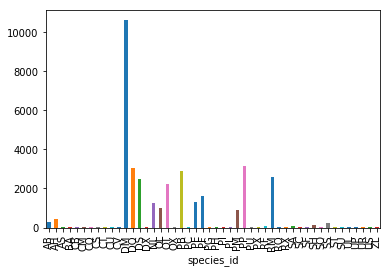

In [24]:
species_counts.plot(kind='bar')

Some people in class weren't getting graphs in color, so we manually import matplotlib to look at what version of the library we were using...

In [25]:
import matplotlib
print(matplotlib.__version__)

2.1.2


We can also look at how many animals were captured in each plot.

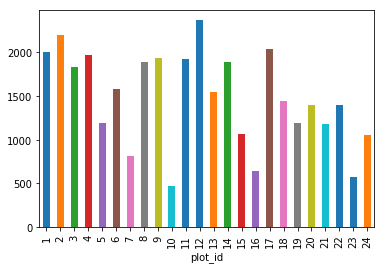

In [26]:
total_count = surveys_df.groupby('plot_id')['record_id'].nunique()
total_count.plot(kind='bar')

**Challenge Question 1**: Create a plot of average weight across all species per plot.

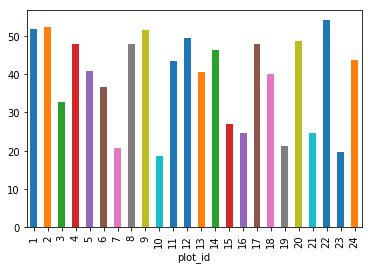

In [27]:
weight_plot = surveys_df.groupby('plot_id')['weight'].mean()
weight_plot.plot(kind='bar')

**Challenge Question 2**: Create a plot of total males versus total females for the entire dataset.

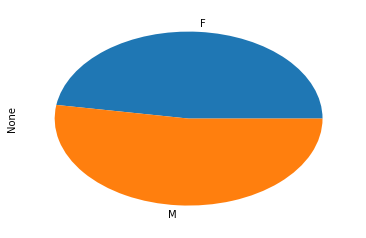

In [33]:
gender_plot = surveys_df.groupby('sex').size()
gender_plot.plot(kind='pie');

Someone asked how you can save a plot generated by Pandas to file. You need to import a specific part of matplotlib and then call the *savefig* method, which will save the most recently generated plot.

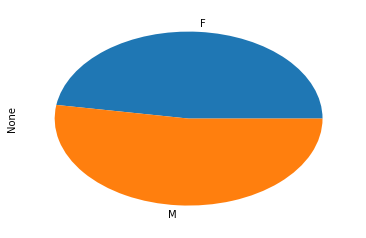

In [38]:
figure = gender_plot.plot(kind='pie').get_figure()

# I'm saving the figure as a PNG here, but there are a lot of 
# different file output options.

figure.savefig('test.png')